## 배달의민족 데이터로 인기메뉴 분석하기 


###  계기 (Why?) 
23년 4월 말부터 '육회한녀석들 본점'에서 아르바이트를 했다.**배달 주문이 들어오는 메뉴, 패턴 등**을 파악하여 매장 운영(매출)에 도움이 되는 데이터를 찾고자 분석을 시작하게 되었다. 


✔️분석을 하기 전, 해결하고 싶은 사항은 다음과 같았다.
-  배달전용 메뉴와, 홀 매장 메뉴(배달, 홀 공통) 중 어떤 메뉴가 가장 인기 있는가? 
-  각 동별 주문건수와 평균 주문금액은 어떨까? 
-  주문시간와 배달 완료시간의 차이는 어떠한가? 거리별, 시간대별 차이를 알아보자 
-  피크시간대에 배달시간을 어떻게 단축 할 수 있을까? 
-  비인기메뉴의 주문율을 어떻게 높일 수 있을까? 인기메뉴를 통해 마진을 극대화 시키는 방법은? 
-  다른 배달 플랫폼의 주문건수를 어떻게 높일 수 있을까? 

### 데이터 정보, 수집방법(How?)

배달의민족(이하 배민)을 제외한 타 플랫폼의 주문건수가 극도로 낮기 때문에, 배민을 통해 들어온 주문정보만을 데이터로 옮겼다. 

따라서, 해당 데이터는 2023년 4월 1일부터 4월 30일까지 배민을 통해 '육회한녀석들 본점'에 주문한 데이터를 포함하고있다. 


- 수집방법: 수기로 적은 뒤 CSV파일로 저장 
- 수집기간: 2023년 5월 20일 ~ 2023년 5월 30일

- 메뉴정보: 각각 메뉴의 중은 200g, 대 250g, 특대는 300g을 의미함. 



## 라이브러리 로드

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import folium
import geopandas as gpd


## 한글폰트 설정하기

In [4]:
plt.rc("font", family=" malgun Gothic")
plt.rc("axes", unicode_minus=False)

## 데이터 불러오기

In [5]:
df = pd.read_csv("C:/Users/hm620/Downloads/Delivery_data의 사본2 - 4월데이터 (2).csv", skipinitialspace=True, encoding='utf-8')

## 데이터 EDA 

In [6]:
df.info()  # info () 메서드를 통해 컬럼명과 각 칼럼의 데이터타입을 확인합니다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       199 non-null    object 
 1   요일       199 non-null    object 
 2   배달 플랫폼   199 non-null    object 
 3   주문시간     199 non-null    object 
 4   메뉴       199 non-null    object 
 5   수량       198 non-null    float64
 6   총 주문가격   199 non-null    int64  
 7   법정동명     199 non-null    object 
 8   위도       199 non-null    float64
 9   경도       199 non-null    float64
 10  배달 완료시간  199 non-null    object 
 11  배달 소요시간  199 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 18.8+ KB


In [7]:
df.head() # head()로 상위 데이터미리보기

,날짜,요일,배달 플랫폼,주문시간,메뉴,수량,총 주문가격,법정동명,위도,경도,배달 완료시간,배달 소요시간
0,4/1,토,배민,17:31,"한우뭉티기 중, 한우육회 대",2.0,75000,금암동,37.173650,127.046494,17:51,0:20
1,4/1,토,배민,19:00,육회한상,1.0,52000,금암동,37.173650,127.046494,19:20,0:20
2,4/1,토,배민,20:28,한우사시미 대,1.0,50000,궐동,37.160886,127.054725,20:28,0:00
3,4/1,토,배민,21:51,육회한상,1.0,52000,금암동,37.173650,127.046494,22:12,0:21
4,4/1,토,배민,22:34,육회한상,1.0,52000,양산동,37.189768,127.020253,22:56,0:22


In [8]:
df.tail() # tail로 하위 데이터 미리보기

,날짜,요일,배달 플랫폼,주문시간,메뉴,수량,총 주문가격,법정동명,위도,경도,배달 완료시간,배달 소요시간
194,4/30,일,배민,17:23,한우육회 대,1.0,34000,원동,37.141252,127.082662,18:12,0:49
195,4/30,일,배민,17:24,한우뭉티기 특대,1.0,58000,금암동,37.173650,127.046494,17:51,0:27
196,4/30,일,배민,20:00,나혼자육회,1.0,26000,부산동,37.153625,127.089079,20:23,0:23
197,4/30,일,배민,20:35,한우육회 대,1.0,34000,수청동,37.167950,127.062575,20:52,0:17
198,4/30,일,배민,21:33,"한우육회 중, 육회비빔밥",2.0,37000,수청동,37.167950,127.062575,21:59,0:26


In [9]:
df.describe() # describe()로 기술 통계값 보기

,수량,총 주문가격,위도,경도
count,198.000000,199.000000,199.000000,199.000000
mean,1.414141,42537.733668,37.163870,127.060367
std,0.740560,16239.936704,0.018008,0.018232
min,1.000000,20000.000000,37.129656,127.020253
25%,1.000000,29000.000000,37.146364,127.046494
50%,1.000000,37000.000000,37.167950,127.062575
75%,2.000000,52000.000000,37.181042,127.077883
max,6.000000,106000.000000,37.191722,127.089079


In [10]:
df["법정동명"].unique()  # 법정동명 확인하기 

array(['금암동', '궐동', '양산동', '내삼미동', '수청동', '은계동', '원동', '부산동', '세교동',
       '오산동', '지곶동', '서동', '누읍동', '가수동', '외삼미동', '갈곶동', '고현동', '청호동'],
      dtype=object)

## 동별 평균 주문가격, 주문건수 생성하기

### 동별 평균 주문가격 

In [11]:
df_average_sales = df.groupby('법정동명')['총 주문가격'].mean().round(2) # groupby를 사용해 동별 평균 주문가격을 구한다. 
df_average_sales

법정동명
가수동     39125.00
갈곶동     43000.00
고현동     28000.00
궐동      37250.00
금암동     45861.11
내삼미동    31827.59
누읍동     28000.00
부산동     37000.00
서동      45500.00
세교동     42666.67
수청동     58625.00
양산동     57750.00
오산동     37545.45
외삼미동    43750.00
원동      46885.97
은계동     52000.00
지곶동     57000.00
청호동     28000.00
Name: 총 주문가격, dtype: float64

### Seaborn으로 시각화 하기

Text(0.5, 1.0, '동별 평균 주문가격')

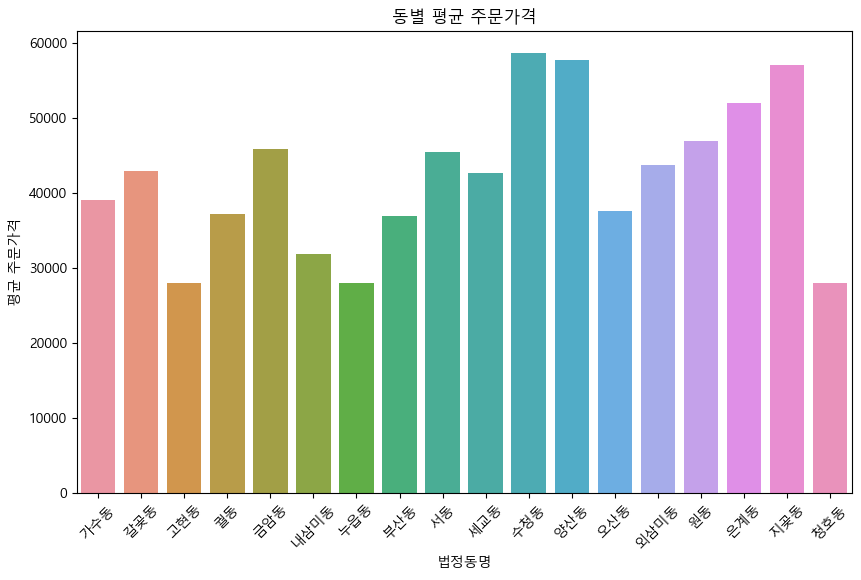

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_average_sales.index, y=df_average_sales)
plt.xticks(rotation=45)
plt.xlabel('법정동명')
plt.ylabel('평균 주문가격')
plt.title('동별 평균 주문가격')


### 동별 주문건수 

In [11]:
df_order_count = df.groupby('법정동명').size().reset_index(name='주문건수')
df_order_count_sorted = df_order_count.sort_values(by='주문건수', ascending=False)
df_order_count_sorted

,법정동명,주문건수
4,금암동,36
14,원동,35
5,내삼미동,29
3,궐동,16
7,부산동,13
9,세교동,12
11,양산동,12
12,오산동,11
10,수청동,8
0,가수동,8


Text(0.5, 1.0, '동별 주문건수')

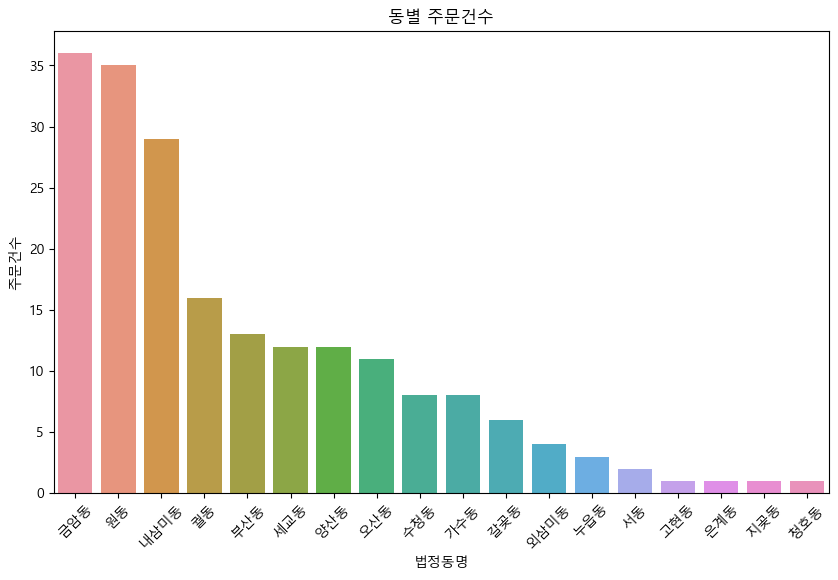

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='법정동명', y='주문건수', data=df_order_count_sorted)
plt.xticks(rotation=45)
plt.xlabel('법정동명')
plt.ylabel('주문건수')
plt.title('동별 주문건수')


### folium으로 시각화하기

In [13]:
from folium.plugins import MarkerCluster

m = folium.Map([df["위도"].mean(), df["경도"].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)


color_mapping = {
    "내삼미동": "red",
    "고현동": "green",
    
    # ...
}

m = folium.Map([df["위도"].mean(), df["경도"].mean()], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

for i in df.index:
    lat = df.loc[i, "위도"]
    long = df.loc[i, "경도"]
    address = df.loc[i, "법정동명"]

    if pd.notnull(lat) and pd.notnull(long):  # NaN이 아닌 경우에만 처리
        icon_color = color_mapping.get(address, "blue")

        folium.Marker(
            [lat, long],
            icon=folium.Icon(color=icon_color),
            popup=f'<i>{address}</i>',
            tooltip=address
        ).add_to(marker_cluster)
    
m


## 메뉴별 주문건수 산출하기

### Counter 클래스 사용하기

Text(0.5, 1.0, '메뉴별 주문 횟수')

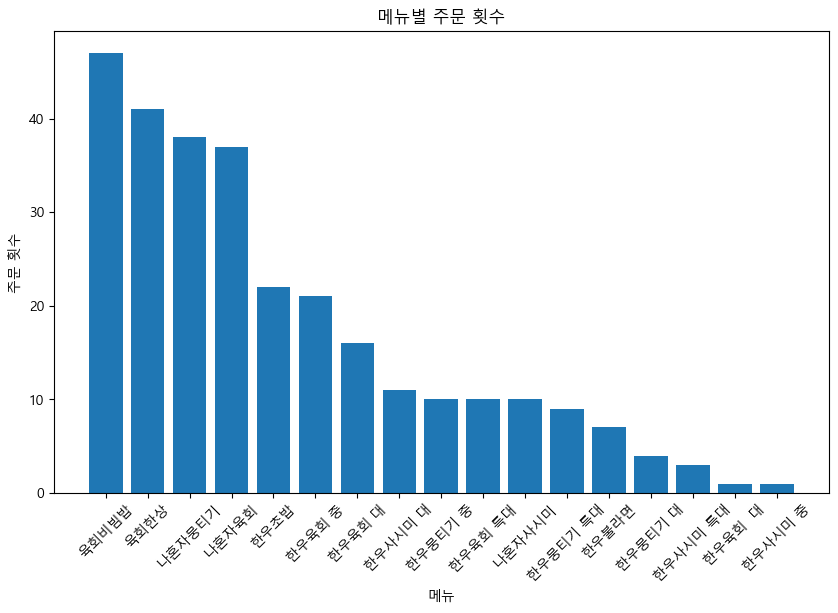

In [14]:
from collections import Counter

menu_counts = Counter(df["메뉴"].str.split(", ").explode())
menu_counts_sorted = sorted(menu_counts.items(), key=lambda x: x[1], reverse=True)
menu_labels = [menu for menu, count in menu_counts_sorted]
menu_counts = [count for menu, count in menu_counts_sorted]

plt.figure(figsize=(10, 6))
plt.bar(menu_labels, menu_counts)
plt.xticks(rotation=45)
plt.xlabel('메뉴')
plt.ylabel('주문 횟수')
plt.title('메뉴별 주문 횟수')


### 요일별, 시간대별 주문건수 출력해보기

In [15]:
df['주문시간대'] = pd.to_datetime(df['주문시간']).dt.hour
df_order_count = df.groupby(['요일', '주문시간대']).size().reset_index(name='주문건수')
df_order_count = df_order_count.pivot(index='요일', columns='주문시간대', values='주문건수')

df_order_count



주문시간대,16,17,18,19,20,21,22,23
요일,,,,,,,,
금,NaN,3.0,4.0,7.0,6.0,7.0,4.0,2.0
목,NaN,1.0,4.0,6.0,4.0,5.0,3.0,NaN
수,1.0,1.0,7.0,8.0,8.0,4.0,1.0,2.0
월,NaN,3.0,3.0,4.0,4.0,2.0,5.0,1.0
일,NaN,2.0,3.0,9.0,7.0,7.0,3.0,1.0
토,NaN,3.0,6.0,4.0,6.0,5.0,4.0,1.0
화,1.0,2.0,5.0,5.0,6.0,6.0,2.0,1.0


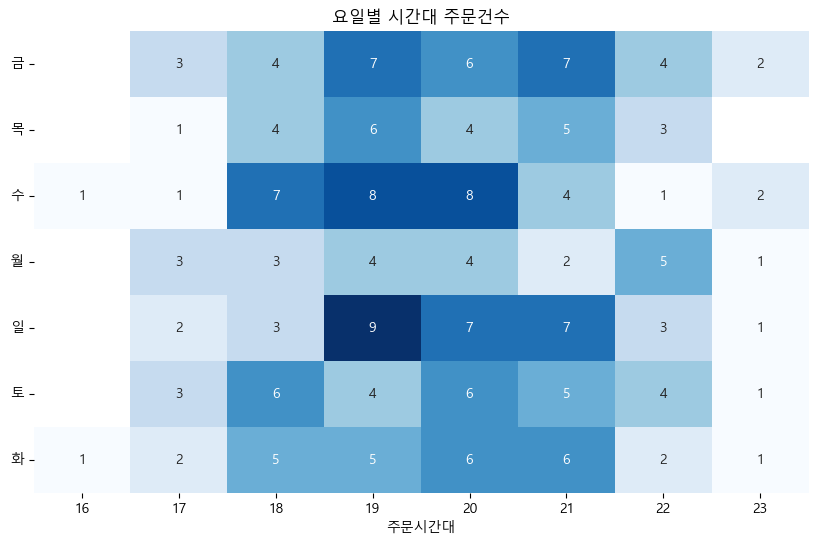

In [16]:
df_order_count = df.groupby(['요일', '주문시간대']).size().reset_index(name='주문건수')
df_order_count = df_order_count.pivot(index='요일', columns='주문시간대', values='주문건수')

# 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(df_order_count, cmap='Blues', annot=True, cbar=False)
plt.title('요일별 시간대 주문건수')
plt.xlabel('주문시간대')
plt.ylabel('')

# 레이블 표시 방향 조정
plt.yticks(rotation=0)

plt.show()

## 배달 소요시간 산출하기

### 배달 소요시간 data type 변환하기

네이버지도 기준 각 동별 거리와 소요시간은 다음과 같다


|  동명    | 거리  | 소요시간 |
|:-----------|:-----------|:------------|
| 가수동   | 3.6km | 10분     |
| 갈곶동   | 6.7km | 21분     |
| 고현동   | 7.3km | 24분     |
| 궐동     | 2.6km | 7분      |
| 금암동   | 1.0km | 2분      |
| 내삼미동 | 1.8km | 6분      |
| 누읍동   | 4.7km | 13분     |
| 부산동   | 6.3km | 18분     |
| 서동     | 4.2km | 12분     |
| 세교동   | 2.0km | 5분      |
| 수청동   | 2.8km | 7분      |
| 양산동   | 5.5km | 11분     |
| 오산동   | 4.2km | 13분     |
| 외삼미동 | 3.4km | 10분     |
| 원동     | 6.8km | 22분     |
| 은계동   | 3.9km | 10분     |
| 지곶동   | 3.5km | 9분      |
| 청호동   | 7.7km | 25분     |







In [17]:
#  배달 소요시간이 object type으로 되어있기 때문에 형변환을 해야 한다. 
# 그러나, ':' 이 존재하기 때문에 astype으로는 불가능하고, 함수들 생성해준다

def convert_time_to_minutes(time_str):
    parts = time_str.split(":")
    hours = int(parts[0])
    minutes = int(parts[1])
    total_minutes = hours * 60 + minutes
    return total_minutes

df['배달 소요시간'] = df['배달 소요시간'].apply(convert_time_to_minutes)


In [18]:
df_delivery_time = df.groupby('법정동명')['배달 소요시간'].mean()
df_delivery_time

법정동명
가수동     40.250000
갈곶동     49.000000
고현동     40.000000
궐동      23.250000
금암동     25.277778
내삼미동    24.310345
누읍동     31.666667
부산동     36.923077
서동      36.500000
세교동     24.583333
수청동     19.875000
양산동     31.166667
오산동     32.363636
외삼미동    29.000000
원동      43.400000
은계동     25.000000
지곶동     40.000000
청호동     51.000000
Name: 배달 소요시간, dtype: float64

<AxesSubplot:xlabel='배달 소요시간', ylabel='법정동명'>

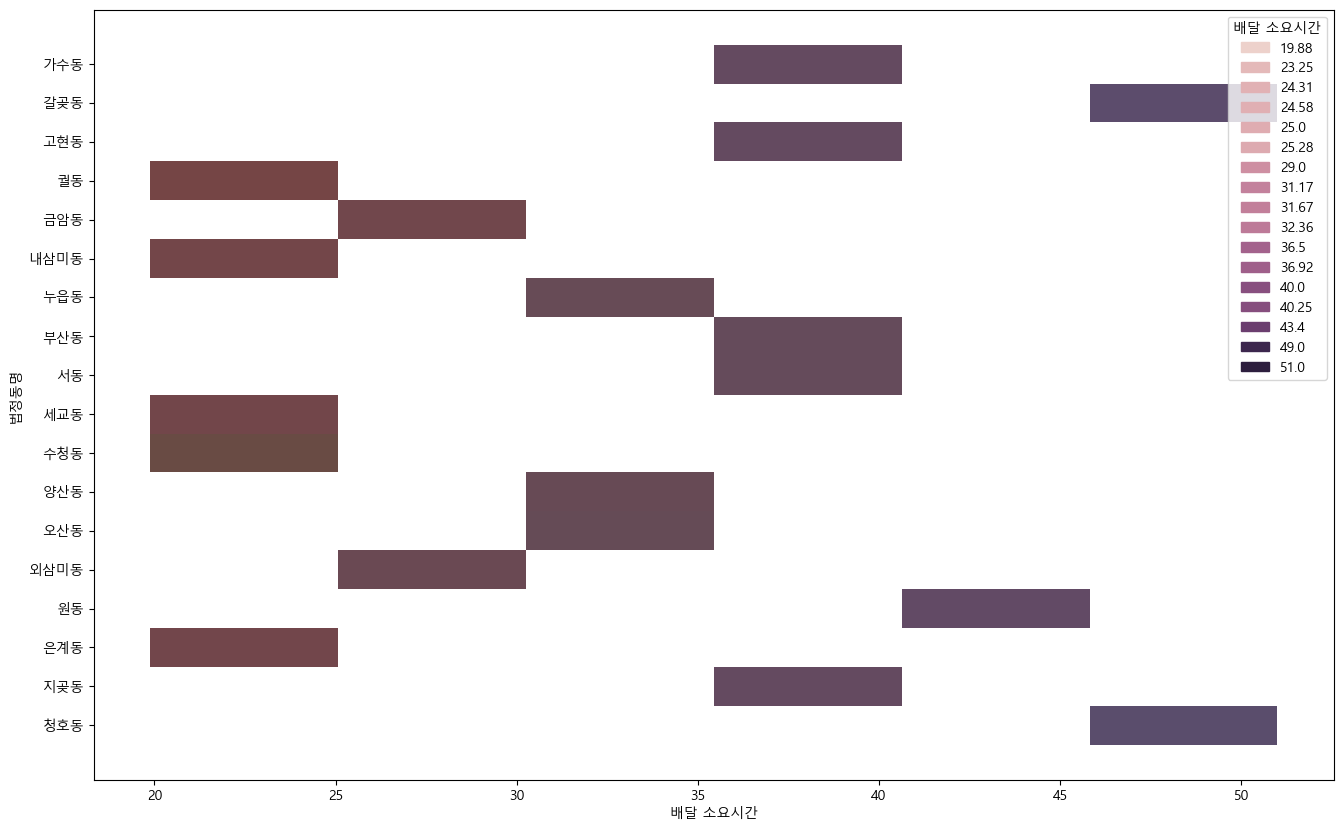

In [31]:
df_delivery_time = round(df.groupby('법정동명')['배달 소요시간'].mean().reset_index(),2)

plt.figure(figsize=(16,10), dpi=100)
sns.histplot(data=df_delivery_time, x="배달 소요시간", y="법정동명", hue="배달 소요시간")



## 제안

### 배달 플랫폼별 시장 점유율 및 수수료(Commision 정리)

- 분석 플랫폼 모바일인덱스에 따르면, 월간활성화이용자수(MAU)를 바탕으로 분석한 배달 앱 3사 시장점유율은 배달의민족 67%, 요기요 22%, 쿠팡이츠 11% 순이었다.

- 플랫폼별 수수료는 다음 사진과 같다. 여기서 단가가 2만9천원인 '나혼자뭉티기'를 주문받았다고 가정해보자.  


   **배민1**: 중계 수수료 1972원 + 점주부담 배달료 3000원 = 4972원   
   **요기요**: 중계 수수료 3625원 + 점주부담 배달료 3000원 = 6625원  
   **쿠팡이츠**:중계 수수료 2,175 + 점주부담 배달료 3000원 = 5175원  
   
배달을 하는 것만으로 평균적으로 5천원 이상의 비용이 발생한다.    
   
   
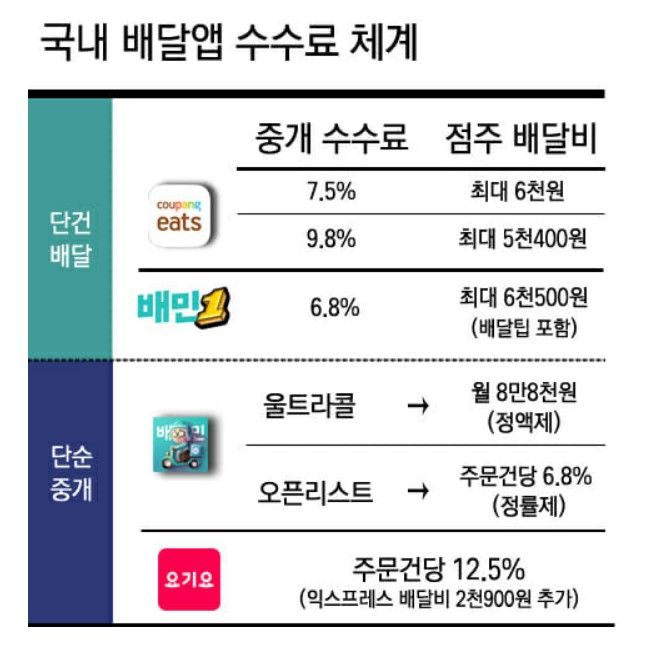




출처:[한겨레](https://www.hani.co.kr/arti/economy/consumer/1039479.html), [지디넷코리아](https://zdnet.co.kr/view/?no=20220330164212)



### 포장 활성화방안

- 4월 데이터 기준, 200건의 주문 중 매장과 1km이하 거리에 위치해 있는 금암동과 세교동의 주문은 전체의 24%를 차지한다.  따라서 포장주문을 활성화 한다면 중계 수수료와 배달료를 절약 할 수 있다.
- 배민은 아직까지 포장에 대한 중계 수수료를 받고있지 않다. 다만 요기요는 포장도 수수료를 받음. 
- 네이버 포장주문을 아직 활용하고 있지 않은데, 0.88%의 결제 수수료를 제외하곤 추가요금이 없다. 